# Aufgabe: *Auto- und Kreuzkorrelationen*

Das folgende Programm generiert die C/A Codes der Satelliten 1, 2, 3 und 4.

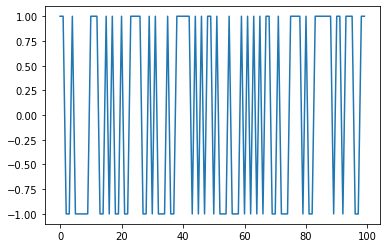

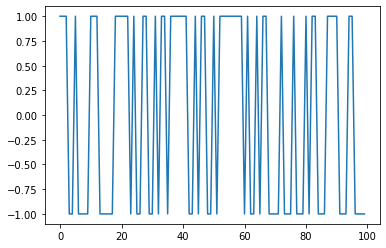

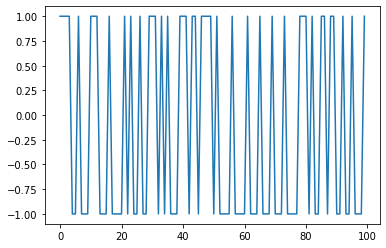

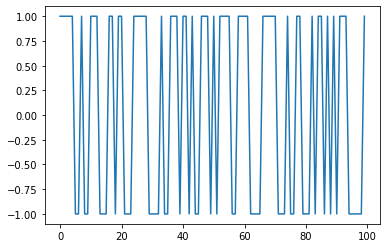

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# register sampling for various SVs
g2s_sv1 = np.array([0,1,0,0,0,1,0,0,0,0])
g2s_sv2 = np.array([0,0,1,0,0,0,1,0,0,0])
g2s_sv3 = np.array([0,0,0,1,0,0,0,1,0,0])
g2s_sv4 = np.array([0,0,0,0,1,0,0,0,1,0])

# generate sequence s1 of SV1
g1 = np.array([1,1,1,1,1,1,1,1,1,1])
g2 = np.array([1,1,1,1,1,1,1,1,1,1])
s1 = np.zeros(1023)
for i in np.arange(1023):
  y1 = g1[9]
  y2 = np.sum(g2*g2s_sv1)%2
  s1[i] = 2*((y1+y2)%2)-1
  g1 = np.roll(g1,1)
  g1[0] = np.sum(g1*np.array([1,0,0,1,0,0,0,0,0,0]))%2
  g2 = np.roll(g2,1)
  g2[0] = np.sum(g2*np.array([1,0,1,1,0,0,1,0,1,1]))%2
plt.plot(s1[:100])
plt.show()

# generate sequence s2 of SV2
g1 = np.array([1,1,1,1,1,1,1,1,1,1])
g2 = np.array([1,1,1,1,1,1,1,1,1,1])
s2 = np.zeros(1023)
for i in np.arange(1023):
  y1 = g1[9]
  y2 = np.sum(g2*g2s_sv2)%2
  s2[i] = 2*((y1+y2)%2)-1
  g1 = np.roll(g1,1)
  g1[0] = np.sum(g1*np.array([1,0,0,1,0,0,0,0,0,0]))%2
  g2 = np.roll(g2,1)
  g2[0] = np.sum(g2*np.array([1,0,1,1,0,0,1,0,1,1]))%2
plt.plot(s2[:100])
plt.show()

# generate sequence s3 of SV3
g1 = np.array([1,1,1,1,1,1,1,1,1,1])
g2 = np.array([1,1,1,1,1,1,1,1,1,1])
s3 = np.zeros(1023)
for i in np.arange(1023):
  y1 = g1[9]
  y2 = np.sum(g2*g2s_sv3)%2
  s3[i] = 2*((y1+y2)%2)-1
  g1 = np.roll(g1,1)
  g1[0] = np.sum(g1*np.array([1,0,0,1,0,0,0,0,0,0]))%2
  g2 = np.roll(g2,1)
  g2[0] = np.sum(g2*np.array([1,0,1,1,0,0,1,0,1,1]))%2
plt.plot(s3[:100])
plt.show()

# generate sequence s4 of SV4
g1 = np.array([1,1,1,1,1,1,1,1,1,1])
g2 = np.array([1,1,1,1,1,1,1,1,1,1])
s4 = np.zeros(1023)
for i in np.arange(1023):
  y1 = g1[9]
  y2 = np.sum(g2*g2s_sv4)%2
  s4[i] = 2*((y1+y2)%2)-1
  g1 = np.roll(g1,1)
  g1[0] = np.sum(g1*np.array([1,0,0,1,0,0,0,0,0,0]))%2
  g2 = np.roll(g2,1)
  g2[0] = np.sum(g2*np.array([1,0,1,1,0,0,1,0,1,1]))%2
plt.plot(s4[:100])
plt.show()

## Aufgabe 1

> Stellen Sie mit den Befehlen
```
np.correlate(...,...,mode='valid')
```
> und
```
plt.plot(...)
```
> verschiedene periodische Auto- und Kreuzkorrelationen dar. Sie können zwei Kopien einer Sequenz zusammenfügen durch
```
np.concatenate((...,...))
```


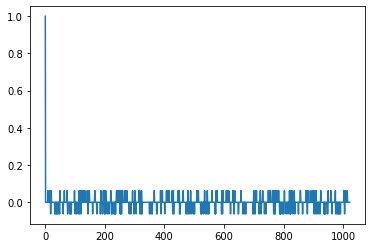

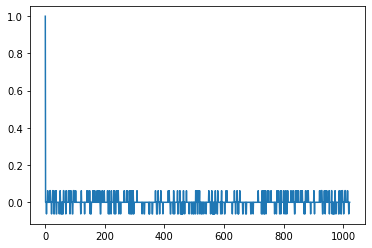

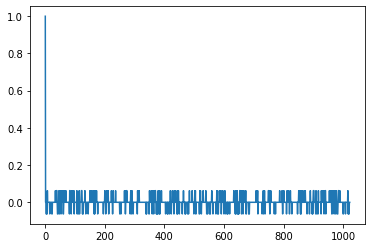

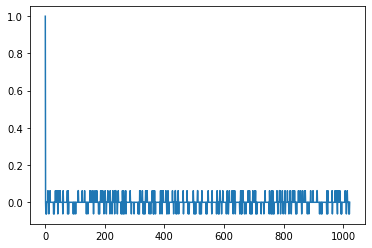

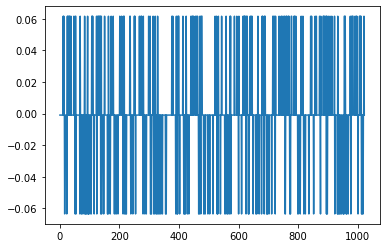

In [2]:
# autocorrelation of s1
plt.plot(np.correlate(np.concatenate((s1,s1[0:-1])),s1,mode='valid')/1023)
plt.show()
# autocorrelation of s2
# ...
plt.plot(np.correlate(np.concatenate((s2,s2[0:-1])),s2,mode='valid')/1023)
plt.show()
# autocorrelation of s3
# ...
plt.plot(np.correlate(np.concatenate((s3,s3[0:-1])),s3,mode='valid')/1023)
plt.show()
# autocorrelation of s4
# ...
plt.plot(np.correlate(np.concatenate((s4,s4[0:-1])),s4,mode='valid')/1023)
plt.show()
# crosscorrelation of s1,s2
# ...
plt.plot(np.correlate(np.concatenate((s1, s1[0:-1])),s2,mode='valid')/1023)
plt.show()

## Aufgabe 2

> Ein GPS-Empfänger beobachtet das Signal $r[k]$, mit 1023 Samples pro Millisekunde, enthalten in der Variablen r.

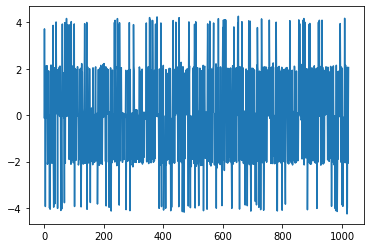

In [3]:
import requests
import io

response = requests.get('https://epot3d.ch/PrinciplesOfCommunications/gpsrxsig.npy')
r = np.load(io.BytesIO(response.content))
plt.plot(r)
plt.show()


> Schätzen Sie die Verzögerungen der Signale ausgehend von den vier Satelliten 1, 2, 3 und 4.

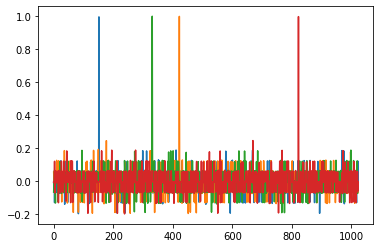

signal delays: 152 422 331 822


In [4]:
# ...

# Calculate cross correlate between s1 and the pattern
c1 = np.correlate(np.concatenate((r, r[0:-1])),s1,mode='valid')/1023
plt.plot(c1)

# Calculate cross correlate between s2 and the pattern
c2 = np.correlate(np.concatenate((r, r[0:-1])),s2,mode='valid')/1023
plt.plot(c2)

# Calculate cross correlate between s3 and the pattern
c3 = np.correlate(np.concatenate((r, r[0:-1])),s3,mode='valid')/1023
plt.plot(c3)

# Calculate cross correlate between s4 and the pattern
c4 = np.correlate(np.concatenate((r, r[0:-1])),s4,mode='valid')/1023
plt.plot(c4)
plt.show()

i1 = np.argmax(c1)
i2 = np.argmax(c2)
i3 = np.argmax(c3)
i4 = np.argmax(c4)
print('signal delays:',i1,i2,i3,i4)

> Kann die Position eines GPS-Empfängers auf Basis der C/A Codes präzise bestimmt werden?

